In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
%load_ext lab_black

## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [3]:
!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet

In [4]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt


print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.24.0
Usando seaborn 0.9.0
Usando scipy 1.2.0


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [5]:
# solução
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.set_index("filmeId", inplace=True)

In [6]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [7]:
print("Carregamos %d filmes" % len(filmes))
if len(filmes) != 9742:
    print(
        "ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos."
    )

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [8]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes["ano_de_lancamento"] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [9]:
# solução
notas = pd.read_csv("ratings.csv")
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [10]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [11]:
# solução
filmes["nota_media"] = notas.groupby("filmeId")["nota"].mean()

In [12]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [13]:
# solução para calcular o total de votos por filme
filmes["total_de_votos"] = notas.groupby("filmeId")["nota"].count()

In [14]:
# solução para criar a nova coluna e filtrar os filmes
filmes = filmes.query("total_de_votos >= 50")

In [15]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

In [16]:
!pip2 install -U statsmodels

  Using cached https://files.pythonhosted.org/packages/ea/0c/5f61f1a3d4385d6bf83b83ea495068857ff8dfb89e74824c6e9eb63286d8/patsy-0.5.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/24/40/11b12af7f322c1e20446c037c47344d89bab4922b8859419d82cf56d796d/scipy-1.2.3-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/db/83/7d4008ffc2988066ff37f6a0bb6d7b60822367dcb36ba5e39aa7801fda54/pandas-0.24.2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/3a/5f/47e578b3ae79e2624e205445ab77a1848acdaa2929a00eeef6b16eaaeb20/numpy-1.16.6-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/65/eb/1f97cb97bfc2390a276969c6fae16075da282f5058082d4cb10c6c5c1dba/six-1.14.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e7/f9/f0b53f88060247251bf481fa6ea62cd0d25bf1b11a87888e53ce5b7c8ad2/pytz-2019.3-py2.py3-none-any.whl
  Using cached https://files.

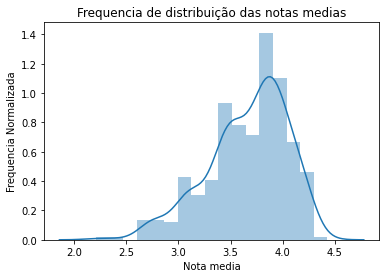

In [17]:
# solução histograma
def print_histograma(var, titulo, xleg, yleg):
    ax = sns.distplot(var, kde=True)
    ax.set_title(titulo)
    ax.set_ylabel(yleg)
    ax.set_xlabel(xleg)
    plt.show()


print_histograma(
    filmes["nota_media"],
    "Frequencia de distribuição das notas medias",
    "Nota media",
    "Frequencia Normalizada",
)

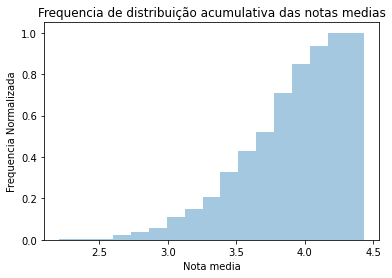

In [18]:
# solução cumulativa
def print_acumulativo(var, titulo, xleg, yleg):
    kwargs = {"cumulative": True}
    ax = sns.distplot(var, norm_hist=True, hist_kws=kwargs, kde_kws=kwargs, kde=False)
    ax.set_title(titulo)
    ax.set_ylabel(yleg)
    ax.set_xlabel(xleg)
    plt.show()


print_acumulativo(
    filmes["nota_media"],
    "Frequencia de distribuição acumulativa das notas medias",
    "Nota media",
    "Frequencia Normalizada",
)

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

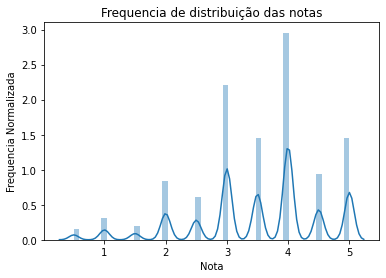

In [19]:
# solução histograma
print_histograma(
    notas["nota"],
    "Frequencia de distribuição das notas",
    "Nota",
    "Frequencia Normalizada",
)

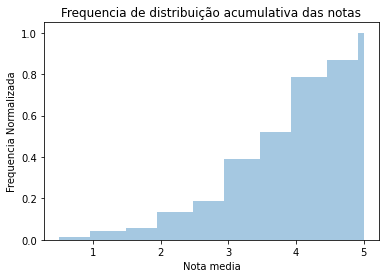

In [20]:
# solução cumulativa
print_acumulativo(
    notas["nota"],
    "Frequencia de distribuição acumulativa das notas",
    "Nota media",
    "Frequencia Normalizada",
)

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [21]:
# solução
nota_limite_dos_20_porcento = notas["nota"].quantile(0.8)

In [22]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 4.50


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [23]:
filmes["generos"] = filmes["generos"].str.replace("-", "")
generos = filmes["generos"].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [24]:
filmes = filmes.join(generos).drop(columns=["generos"], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

,Numero de filmes
Action,164
Adventure,132
Animation,32
Children,47
Comedy,181
Crime,87
Documentary,2
Drama,166
Fantasy,66
FilmNoir,4


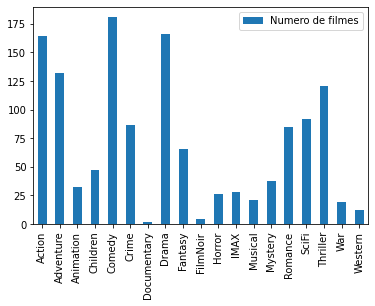

In [25]:
# solução
numero_de_filmes_por_genero = pd.DataFrame(generos.sum(), columns=["Numero de filmes"])
numero_de_filmes_por_genero.plot(kind="bar")
numero_de_filmes_por_genero

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [26]:
# solução
top5_generos_em_quantidade_de_filmes = numero_de_filmes_por_genero.sort_values(
    "Numero de filmes", ascending=False
).head()

In [27]:
print(top5_generos_em_quantidade_de_filmes)

           Numero de filmes
Comedy                  181
Drama                   166
Action                  164
Adventure               132
Thriller                121


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [28]:
votos_por_genero_por_filme = pd.DataFrame(
    (generos.values.T * filmes["total_de_votos"].values).T, columns=generos.columns
)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [29]:
# solucão
numeros_de_votos_por_genero_por_filme = pd.DataFrame(
    votos_por_genero_por_filme.sum(), columns=["Numero de votos"]
)
numeros_de_votos_por_genero_por_filme.sort_values(
    "Numero de votos", ascending=False
).head()

,Numero de votos
Action,15734.0
Drama,15445.0
Comedy,15330.0
Adventure,13117.0
Thriller,11907.0


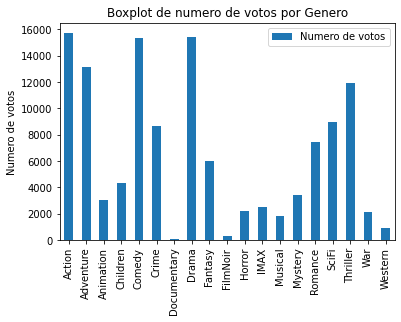

In [30]:
# solução
numeros_de_votos_por_genero_por_filme.plot(kind="bar")
plt.title("Boxplot de numero de votos por Genero")
plt.ylabel("Numero de votos")
plt.show()

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [31]:
# solucao código
df = numeros_de_votos_por_genero_por_filme
df["Numero de filmes"] = numero_de_filmes_por_genero
df["Votos/Filmes"] = df["Numero de votos"] / df["Numero de filmes"]

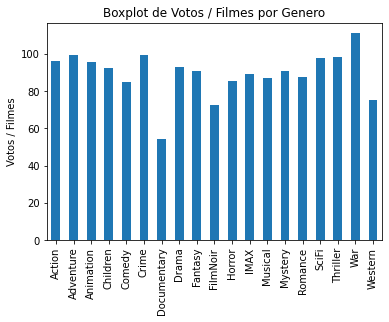

,Numero de votos,Numero de filmes,Votos/Filmes
Action,15734.0,164,95.939024
Adventure,13117.0,132,99.371212
Animation,3066.0,32,95.812500
Children,4331.0,47,92.148936
Comedy,15330.0,181,84.696133
Crime,8649.0,87,99.413793
Documentary,108.0,2,54.000000
Drama,15445.0,166,93.042169
Fantasy,5993.0,66,90.803030
FilmNoir,291.0,4,72.750000


In [32]:
# solução com visualização
df["Votos/Filmes"].plot(kind="bar")
plt.title("Boxplot de Votos / Filmes por Genero")
plt.ylabel("Votos / Filmes")
plt.show()
df

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

Os filmes de AÇÃO são mais comuns do que filmes de GUERRA, além disso a média de votos por filmes de GUERRA é maior do que o de filmes de AÇÃO. O que me deixa uma conclussão de que os filmes de GUERRA são menos comuns porém são mais assistidos do que filmes de AÇÃO.

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

In [33]:
# solução:
horror_ids = filmes[filmes.Horror == 1].index
adventure_ids = filmes[filmes.Adventure == 1].index

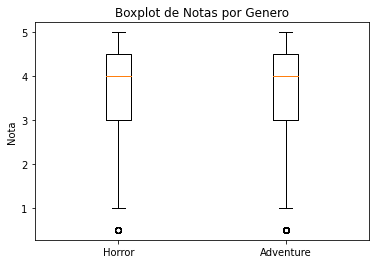

3.716704288939052
3.677174658839674


In [34]:
horror_notas = notas[notas.filmeId.isin(horror_ids)]
adventure_notas = notas[notas.filmeId.isin(adventure_ids)]
plt.boxplot(
    [horror_notas["nota"], adventure_notas["nota"]], labels=["Horror", "Adventure"]
)
plt.title("Boxplot de Notas por Genero")
plt.ylabel("Nota")
plt.show()
print(horror_notas["nota"].mean())
print(adventure_notas["nota"].mean())

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

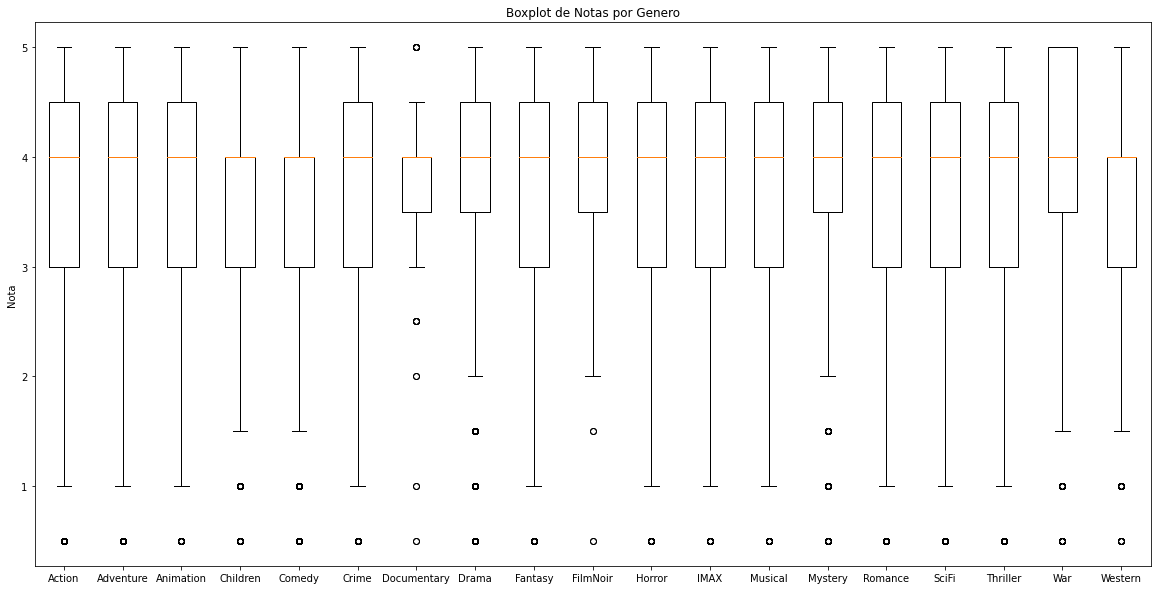

In [35]:
gen_col = list(generos.columns)


def pega_notas_por_genero(genero, notas):
    ids = filmes[filmes[genero] == 1].index
    return notas[notas.filmeId.isin(ids)]["nota"]


notas_por_genero = [pega_notas_por_genero(gen, notas) for gen in gen_col]

plt.figure(figsize=(20, 10))
plt.boxplot(notas_por_genero, labels=gen_col)
plt.title("Boxplot de Notas por Genero")
plt.ylabel("Nota")
plt.show()

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

##### Solução: Basicamente sugiro a escolha do genero Aventura, pois ele tem mais votos totais e maior média de votos por filme. O que mostra ter um publico maior e mais aceito pelo mesmo.
    


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

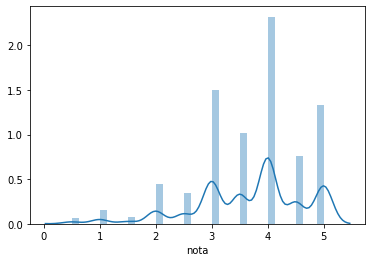

In [36]:
# solucao histograma de aventura
aventura = pega_notas_por_genero("Adventure", notas)
sns.distplot(aventura, norm_hist=True, kde=True)

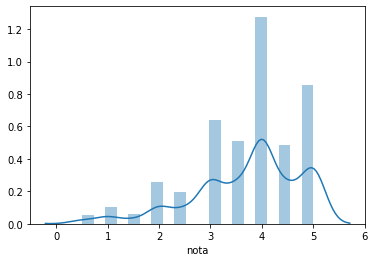

In [37]:
# solucao histograma de horror
horror = pega_notas_por_genero("Horror", notas)
sns.distplot(horror, norm_hist=True, kde=True)

In [38]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest

_, p = normaltest(filmes[filmes.Adventure == 1]["total_de_votos"])
print("p-value Adventure: {}".format(p))

_, p = normaltest(filmes[filmes.Horror == 1]["total_de_votos"])
print("p-value Horror: {}".format(p))

p-value Adventure: 5.987863006199139e-06
p-value Horror: 1.2786148884334685e-07


In [39]:
# solução com o teste desejado
from scipy.stats import ranksums

_, p = ranksums(
    filmes[filmes.Adventure == 1]["total_de_votos"],
    filmes[filmes.Horror == 1]["total_de_votos"],
)
print(
    "p-value para a hipotese nula de que as duas distribuições são a mesmsa: {}".format(
        p
    )
)

p-value para a hipotese nula de que as duas distribuições são a mesmsa: 0.04782366231999856


### Solução (explique sua conclusão):



## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

In [40]:
# solução:
def notas_medias_genero(genero):
    filmes_adv_id = filmes[filmes[genero] == 1]
    notas_adv = notas[notas.filmeId.isin(filmes_adv_id.index)]
    return notas_adv.groupby("filmeId")["nota"].mean()

In [41]:
notas_medias_adv = notas_medias_genero("Adventure")
notas_medias_hrr = notas_medias_genero("Horror")

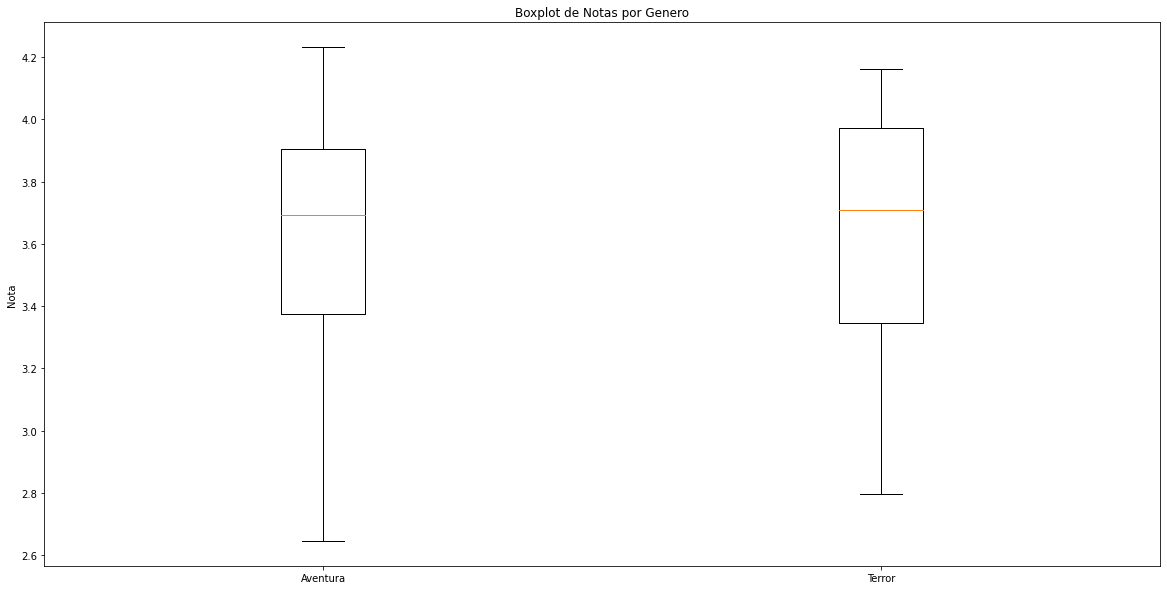

In [42]:
plt.figure(figsize=(20, 10))
plt.boxplot([notas_medias_adv, notas_medias_hrr], labels=["Aventura", "Terror"])
plt.title("Boxplot de Notas por Genero")
plt.ylabel("Nota")
plt.show()

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução: Horror, porque pelo boxplot as notas estão concentrada nas pontuações mais altas segundo o gráfico.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

count    132.000000
mean       3.615373
std        0.392217
min        2.645455
25%        3.373580
50%        3.693742
75%        3.904919
max        4.232394
Name: nota, dtype: float64
Coeficiente de variança para as notas médias de Adventure: 0.10848592869468053


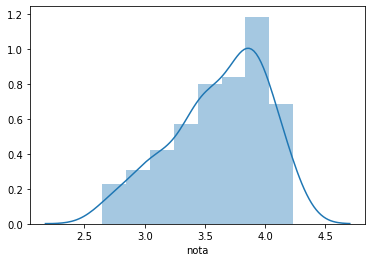

In [43]:
# solucao histograma de aventura
print(notas_medias_adv.describe())
print(
    "Coeficiente de variança para as notas médias de Adventure: {}".format(
        notas_medias_adv.std() / notas_medias_adv.mean()
    )
)
sns.distplot(notas_medias_adv, norm_hist=True, kde=True)

count    26.000000
mean      3.610527
std       0.419267
min       2.796875
25%       3.346470
50%       3.707704
75%       3.972898
max       4.161290
Name: nota, dtype: float64
Coeficiente de variança para as notas médias de Horror: 0.1161234176733678


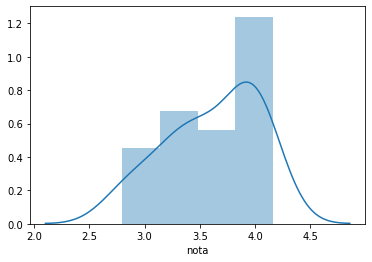

In [44]:
# solucao histograma de horror
print(notas_medias_hrr.describe())
print(
    "Coeficiente de variança para as notas médias de Horror: {}".format(
        notas_medias_hrr.std() / notas_medias_hrr.mean()
    )
)
sns.distplot(notas_medias_hrr, norm_hist=True, kde=True)

In [45]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
_, p = normaltest(filmes[filmes.Adventure == 1]["nota_media"])
print("p-value Adventure: {}".format(p))

_, p = normaltest(filmes[filmes.Horror == 1]["nota_media"])
print("p-value Horror: {}".format(p))

p-value Adventure: 0.012835697582553224
p-value Horror: 0.21186284682483916


In [46]:
# solução com o teste desejado
_, p = ranksums(
    filmes[filmes.Adventure == 1]["nota_media"],
    filmes[filmes.Horror == 1]["nota_media"],
)
print(
    "p-value para a hipotese nula de que as duas distribuições são a mesmsa: {}".format(
        p
    )
)

p-value para a hipotese nula de que as duas distribuições são a mesmsa: 0.8310397344212459


## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:


## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:



## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [47]:
votos_por_genero = pd.DataFrame(
    votos_por_genero_por_filme.sum(), columns=["Número de Notas"]
)

In [48]:
# solução: calculando os 2 generos mais votados
votos_por_genero.sort_values("Número de Notas", ascending=False, inplace=True)
votos_por_genero

# Action e Drama são os mais votados
filmes_mais_votados = filmes[(filmes.Action == 1) | (filmes.Drama == 1)]

In [49]:
# solução: encontrando os top 5 filmes desses generos
filmes_mais_votados.sort_values("total_de_votos", ascending=False, inplace=True)
filmes_mais_votados.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
356,Forrest Gump (1994),1994.0,4.164134,329.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
318,"Shawshank Redemption, The (1994)",1994.0,4.429022,317.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
296,Pulp Fiction (1994),1994.0,4.197068,307.0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
2571,"Matrix, The (1999)",1999.0,4.192446,278.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
260,Star Wars: Episode IV - A New Hope (1977),1977.0,4.231076,251.0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?
Os generos Drama e Crime tem maior correlação com a nota_media.
Os generos Comedy e Action tem a menor correlação com a nota_media.

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [50]:
# solucao
colunas = list(generos.columns)
colunas.append("nota_media")
corr_genero = pd.DataFrame(filmes[colunas].corr()["nota_media"])
corr_genero.sort_values("nota_media", ascending=False)

,nota_media
nota_media,1.000000
Drama,0.277662
Crime,0.190220
Mystery,0.129914
War,0.125615
FilmNoir,0.081766
IMAX,0.064931
Animation,0.043071
Documentary,-0.003486
Musical,-0.008529


## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`? 
Os generos Adventure e War tem maior correlação com o total_de_votos.
Os generos Western e Comedy tem a menor correlação com o total_de_votos.

In [51]:
# solucao
colunas = list(generos.columns)
colunas.append("total_de_votos")
corr_genero = pd.DataFrame(filmes[colunas].corr()["total_de_votos"])
corr_genero.sort_values("total_de_votos", ascending=False)

,total_de_votos
total_de_votos,1.000000
Adventure,0.104380
War,0.087999
Thriller,0.085525
Crime,0.079766
Action,0.066239
SciFi,0.063802
Animation,0.023442
Drama,0.018779
Children,0.001764


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

In [52]:
ano_lacamento_nota_media = pd.DataFrame(
    filmes.groupby("ano_de_lancamento")["nota_media"].mean()
)
ano_lacamento_nota_media["ano_lancamento"] = ano_lacamento_nota_media.index

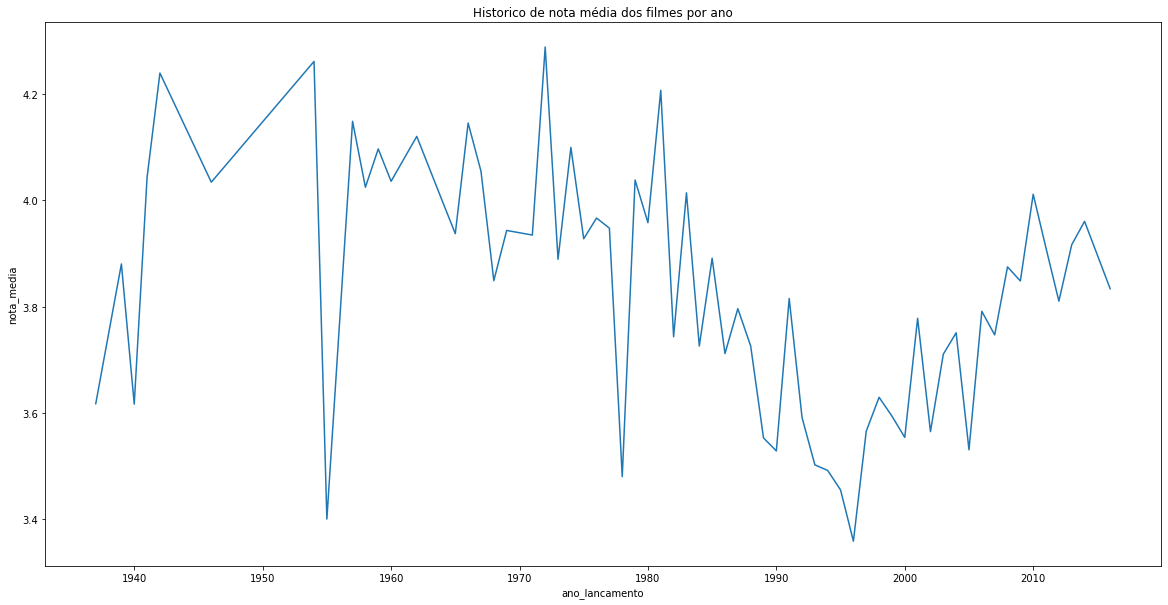

In [53]:
# solucao
plt.figure(figsize=(20, 10))
plt.title("Historico de nota média dos filmes por ano")
plt.ylabel("Nota média")
plt.ylabel("Ano de lançamento")
sns.set(style="darkgrid")
sns.lineplot(x="ano_lancamento", y="nota_media", data=ano_lacamento_nota_media)

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [54]:
# solução (código)
ano_lacamento_nota_media.corr()

,nota_media,ano_lancamento
nota_media,1.000000,-0.385454
ano_lancamento,-0.385454,1.000000


### Solução: 
- Uma correlação negativa, afirma que ao passar dos anos, os filmes recebem uma nota média menor. O que nos deixa com 2 possibilidades, a qualidade dos filmes cairam com o passar dos anos, ou então o jurí ficou mais exigente com os filmes produzidos. Gráficamente percebemos que após o inicio dos anos 80 as notas médias estão caindo. 



## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

In [55]:
# solução
infos = filmes[["ano_de_lancamento", "nota_media", "total_de_votos"]]

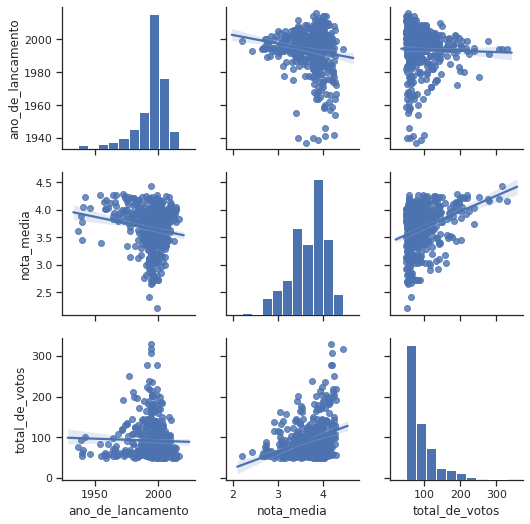

In [56]:
sns.set(style="ticks")
sns.pairplot(infos, kind="reg")

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

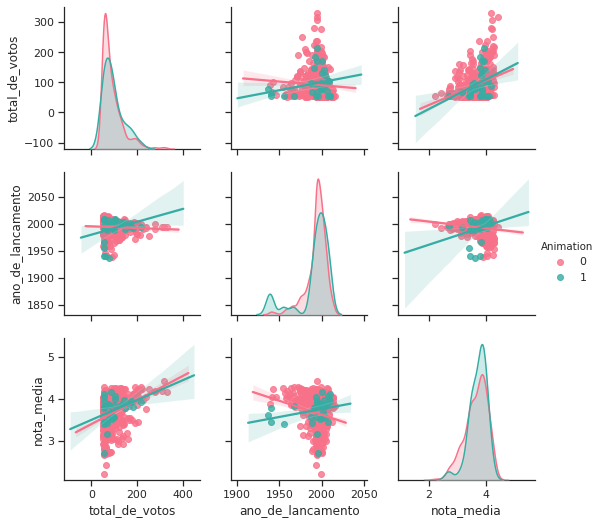

In [57]:
sns.pairplot(
    filmes,
    kind="reg",
    hue="Animation",
    palette="husl",
    vars=["total_de_votos", "ano_de_lancamento", "nota_media"],
)

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:
- Antigamente as notas médias dos filmes de Animation são menores do que os recentes, essa correlação parece ser baixa e linear.
- Antigamento tinhamos menos filmes de Animation sendo lançadas, do que impacta no total de votos.
- Sobre a nota media: podemos concluir que os filmes de Animation mais recentes tem notas melhores (correlação positiva) do que os seus sucessores, o que é o oposto das demais categorias onde com o passar dos anos tem notas menores (correlação negativa). Sobre o total de votos: podemos concluir que os filmes de Animation cresceu (correlação positiva) o seu numero de filmes com o passar dos anos, o que é fortemente sustentado por ter mais filmes no mercado. Já os outros filmes o numero total de votos ficou de maneira constante (sem correlação) no passar do tempo.
- Fica claro para mim que o avanço da tecnologia fez com que filmes de Animation fossem mais bem feitos ou até mesmo realizados. O seu público forte é consideravelmente de pessoas jovens com animações infantil. O publico jovem tambem acaba sendo 'menos rigoroso' o que esse genero ter notas melhores.


## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

##### Bom como toda a analise foi feita em cima dos filmes, e as notas em relação a filmes, vamos tentar descobrir algo sobre quem deu as notas. Proponho fazer uma análise em cima dos Usuários.

In [58]:
users = notas.groupby(["usuarioId"]).agg({"filmeId": "count", "nota": "mean"})
users["userId"] = users.index
users.sort_values("filmeId", ascending=False, inplace=True)

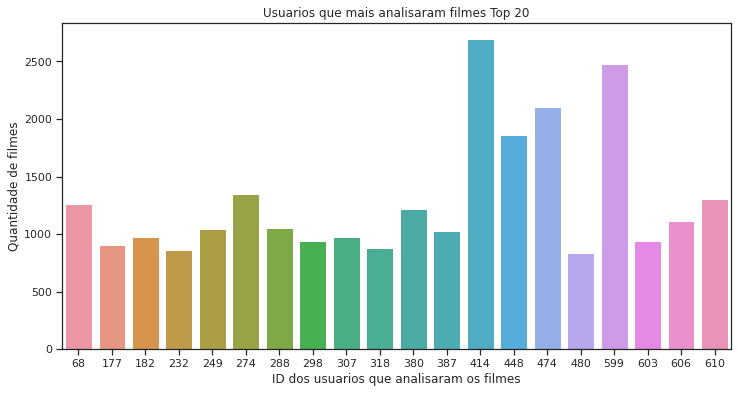

In [59]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="userId", y="filmeId", data=users[:20])
plt.title("Usuarios que mais analisaram filmes Top 20")
plt.ylabel("Quantidade de filmes")
plt.xlabel("ID dos usuarios que analisaram os filmes")
plt.show()

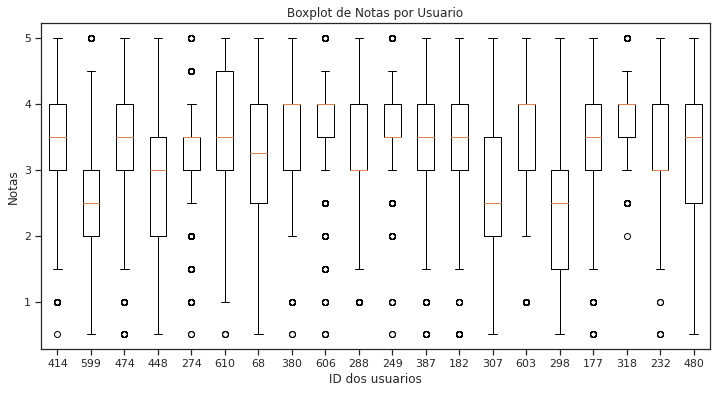

In [60]:
userId_list = list(users["userId"][:20])


def pega_notas_por_usuario(usuarioId):
    return notas[notas["usuarioId"] == usuarioId]["nota"]


notas_por_user = [pega_notas_por_usuario(userId) for userId in userId_list]

plt.figure(figsize=(12, 6))
plt.boxplot(notas_por_user, labels=userId_list)
plt.title("Boxplot de Notas por Usuario")
plt.ylabel("Notas")
plt.xlabel("ID dos usuarios")
plt.show()

Pelo grafico de Boxplot podemos vizualizer que alguns usuários dão notas mais baixas que outros. Por exemplo o usuario 599 costumar a avaliar mal maioria dos filmes, já o usuário 318 costuma a dar notas maiores para os filmes. No geral podemos atribuir pessos, alguem que costuma dar notas baixas atribuiu uma nota alta, esta tem mais valor que alguem que já costuma dar notas altas, assim podemos fazer um sistema de ranking para melhores filmes.

In [61]:
def pega_notas_por_genero(genero, notas):
    return notas[notas[genero] == 1]


def plot_notas_generos_usuario(userId, plot=False):
    notas_do_usuario = notas[notas.usuarioId == userId]
    notas_do_usuario = notas_do_usuario.merge(filmes, on="filmeId")
    if plot:
        notas_por_genero = [
            pega_notas_por_genero(gen, notas_do_usuario)["nota"] for gen in gen_col
        ]
        plt.figure(figsize=(25, 5))
        plt.boxplot(notas_por_genero, labels=gen_col)
        plt.title("Boxplot de Notas por Genero")
        plt.ylabel("Nota")
        plt.show()
    return notas_do_usuario

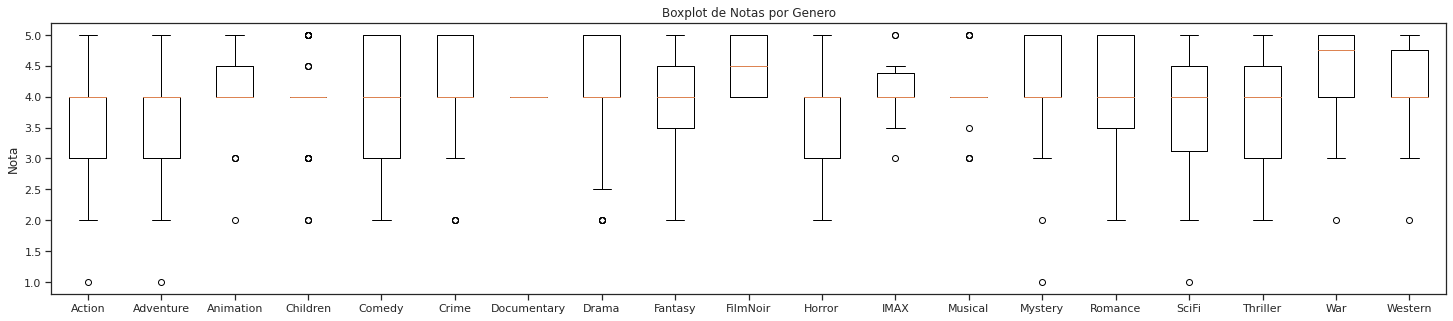

In [62]:
notas_user_414 = plot_notas_generos_usuario(414, True)

Com esse gráfico fica claro que o usuário e pelas notas dadas para o genero de Horror ele não gosta do genero?

Porem me fiz uma pergunta, qual é o genero preferido desse usuário? temos como matetimaticamente afirmar que ele dá notas melhores para um genero, e sendo assim o genero é o seu preferido? Vamos descobrir!

Vamos analisar a média, desvio padrão e coeficiente de variação das notas de cada genero de um usuário. Tambem para ter uma análise mais correta iremos desconsiderar as categorias que tiverem 10 ou menos votos por autor. Se o usuário não tiver mais de 10 votos em nenhuma categoria, não poderemos informar o genero favorito.

In [63]:
notas_user = plot_notas_generos_usuario(414)
notas_por_genero = [pega_notas_por_genero(gen, notas_user) for gen in gen_col]
notas_por_genero = pd.DataFrame(
    [ng.describe()["nota"] for ng in notas_por_genero], index=gen_col
)
notas_por_genero["cv"] = (notas_por_genero["std"]) / (notas_por_genero["mean"])
tabela_de_dados = round(
    notas_por_genero[["count", "mean", "std", "cv"]]
    .query("count > 10")
    .sort_values("cv"),
    3,
)

In [64]:
tabela_de_dados

,count,mean,std,cv
IMAX,26.0,4.038,0.467,0.116
Musical,21.0,4.024,0.602,0.150
Animation,32.0,4.078,0.661,0.162
Drama,160.0,4.112,0.785,0.191
Children,45.0,3.944,0.778,0.197
Crime,85.0,4.153,0.827,0.199
Romance,81.0,4.000,0.822,0.205
War,18.0,4.306,0.893,0.208
SciFi,90.0,3.911,0.837,0.214
Fantasy,62.0,3.911,0.857,0.219


In [65]:
!pip install ray

Defaulting to user installation because normal site-packages is not writeable


In [66]:
import ray

ray.init(ignore_reinit_error=True)


@ray.remote
def melhor_genero(userId):
    try:
        notas_user = plot_notas_generos_usuario(userId)
        notas_por_genero = [pega_notas_por_genero(gen, notas_user) for gen in gen_col]
        notas_por_genero = pd.DataFrame(
            [ng.describe()["nota"] for ng in notas_por_genero], index=gen_col
        )
        notas_por_genero["cv"] = (notas_por_genero["std"]) / (notas_por_genero["mean"])
        tabela_de_dados = round(
            notas_por_genero[["count", "mean", "std", "cv"]]
            .query("count > 10")
            .sort_values("cv"),
            3,
        )
        return tabela_de_dados.index[0]
    except:
        # Caso a pessoa não tenha mais de 10 votos em um especifico genero....
        return "Nao Identificado"

2020-03-27 01:44:12,916	WARNING services.py:586 -- setpgrp failed, processes may not be cleaned up properly: [Errno 1] Operation not permitted.
2020-03-27 01:44:12,920	INFO resource_spec.py:212 -- Starting Ray with 4.54 GiB memory available for workers and up to 2.29 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-27 01:44:13,261	INFO services.py:1078 -- View the Ray dashboard at localhost:8265


In [ ]:
users["generoFavorito"] = ray.get([melhor_genero.remote(uid) for uid in users.userId])

In [ ]:
cout_users = pd.DataFrame(users["generoFavorito"].value_counts())

In [ ]:
cout_users.columns = ["Quantidade de usuarios"]

In [ ]:
cout_users["Genero"] = cout_users.index

In [ ]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(x="Genero", y="Quantidade de usuarios", data=cout_users)
plt.title("Numero de usuarios que tem genero favorito")
plt.ylabel("Quantidade de usuarios")
plt.xlabel("Categoria de genero")
plt.show()

Podemos ver que o genero Drama é mais aclamado pelos criticos de cinema. E segundo uma reporta da BBC que está nesse [link](https://www.bbc.com/portuguese/curiosidades-51390633), Drama é o genero mais bem sucessido na maior premiação do cinema, o Oscar.

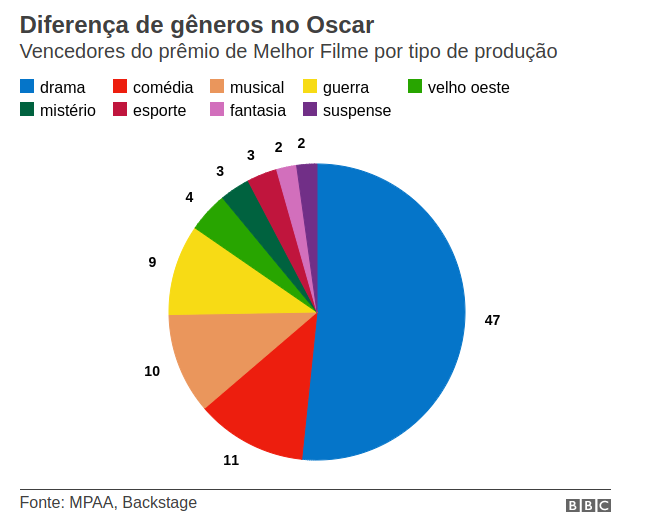

Imagem retirada do site da reportagem mostra que o genero Drama é aclamado pelos criticos e isso reflete no nosso dataset.